In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/mmorenorolon/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

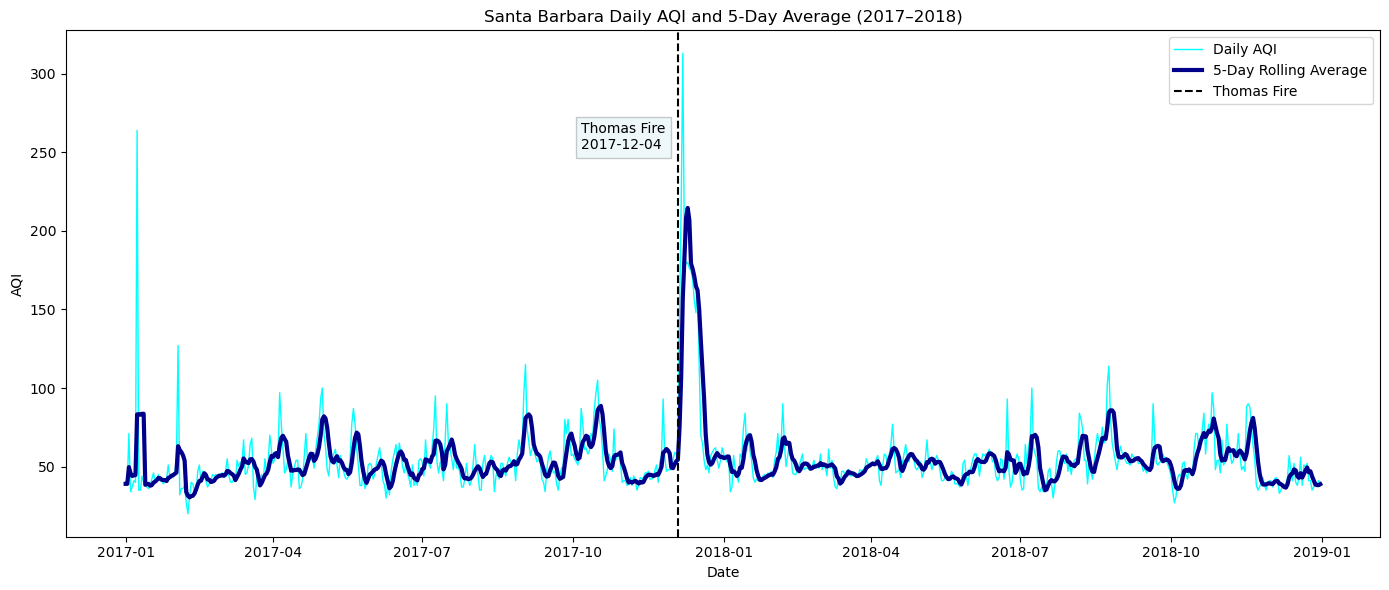

In [2]:
# COMPLETE WORKFLOW

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load AQI data for 2017 and 2018
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip", compression='zip')
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip", compression='zip')

# Combine AQI data from both years into a single dataframe
aqi = pd.concat([aqi_17, aqi_18])

# Clean column names: lowercase and replace spaces with underscores
aqi.columns = (aqi.columns.str.lower().str.replace(' ', '_'))

# Filter the joined dataframe for Santa Barbara County
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Remove unnecessary columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code', 'county_code'])

# Convert 'date' column to datetime and set as the index
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])
aqi_sb = aqi_sb.set_index('date')

# Calculate 5-day rolling average of AQI
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

# Create an empty figure to plot the data
plt.figure(figsize = (14, 6))

# Plot the Daily AQI values
plt.plot(aqi_sb.index, aqi_sb['aqi'], label = 'Daily AQI', linewidth = 1, color='cyan')

# Plot the 5-day rolling average values
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label = '5-Day Rolling Average', linewidth = 3, color = 'darkblue')

# Mark the start date of the Thomas Fire event
plt.axvline(pd.to_datetime('2017-12-04'), color = 'k', linestyle='--', label = 'Thomas Fire')

# Annotate the Thomas Fire event
plt.text(pd.to_datetime('2017-10-06'), 250, 'Thomas Fire\n2017-12-04',
         rotation = 360, verticalalignment = 'bottom', fontsize = 10,
         bbox = dict(facecolor = 'lightblue', alpha = 0.2))

# Add a title, axis labels
plt.title('Santa Barbara Daily AQI and 5-Day Average (2017–2018)')
plt.xlabel('Date')
plt.ylabel('AQI')

# Display the legend and adjust the layout
plt.legend()
plt.tight_layout()
plt.show()

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [3]:
# Load libraries
import pandas as pd
import numpy as np

# Read in AQI data for 2017 and 2018
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip", compression = 'zip')
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip", compression = 'zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [4]:
# a. View the first five rows of the aqi_17 dataframe
aqi_17_head = aqi_17.head()

In [5]:
# b. View the first five rows of the aqi_18 dataframe
aqi_18_head = aqi_18.head()

In [6]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [7]:
# View general summary information of aqi_17
print("Summary statistics of aqi_17:\n", aqi_17.describe())

# View general summary information of aqui_18
print("Summary statistics of aqi_18:\n", aqi_18.describe())

# View the count of missing values for each column of aqi_17
print("Missing values in aqi_17:\n", aqi_17.isnull().sum())

# View the count of missing values for each column of aqi_18
print("Missing values in aqi_18:\n", aqi_18.isnull().sum())

# View the number of rows and columns of aqi_17
print("Shape of aqi_17:\n", aqi_17.shape)

# View the number of rows and columns of aqi_18
print("Shape of aqi_18:\n", aqi_18.shape)

# View the data types of aqi_17
print("Data types of aqi_17:\n", aqi_17.dtypes)

# View the data types of aqi_18
print("Data types of aqi_18:\n", aqi_18.dtypes)

Summary statistics of aqi_17:
           State Code    County Code            AQI  Number of Sites Reporting
count  326801.000000  326801.000000  326801.000000              326801.000000
mean       30.116484      79.492147      43.342609                   2.024480
std        16.136776      89.537959      23.339487                   2.460303
min         1.000000       1.000000       0.000000                   1.000000
25%        17.000000      23.000000      32.000000                   1.000000
50%        30.000000      59.000000      42.000000                   1.000000
75%        42.000000     105.000000      52.000000                   2.000000
max        80.000000     840.000000    3767.000000                  36.000000
Summary statistics of aqi_18:
           State Code    County Code            AQI  Number of Sites Reporting
count  327541.000000  327541.000000  327541.000000              327541.000000
mean       30.045558      79.304511      43.126421                   2.018825
st

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I decided to follow this line of data exploration: `df.describe()`, `df.isnull().sum()`, `df.shape`, and `df.dtypes`. The data exploration of the `aqi_17` and `aqi_18` datasets reveals a collection of air quality measurements across U.S. counties for the years 2017 and 2018. Each dataset contains over 326,000 records and 10 columns. There are no missing data vallues, which ensures high data integrity. The AQI values show similar year-to-year distributions, with mean values around 43 and medians near 41–42. This detail indicates a stable and satisfactory average air quality. However, the 2017 dataset includes an unusually high maximum AQI of 3,767, which could be an outlier or data error, since the 2018 maximum is 1,051. The number of reporting sites per record is typically one, but some counties report from up to 36 sites, which seems to suggest variability in monitoring coverage. Both datasets use appropriate data types, with categorical fields stored as objects and numerical fields as integers. Overall, the datasets are clean, making them suitable for a deeper analysis into pollutant sources and air quality categories.

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [8]:
# Join `aqi_17` and `aqi_18` datasets  
aqi = pd.concat([aqi_17, aqi_18])

# View the dataframe
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [9]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [10]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



#### Line by line description of code 
##### Simplify column names

- `aqi.columns = (aqi.columns`: This line accesses the column names of the `aqi` dataframe and prepares to assign a modified version back to `aqi.columns`.
- `.str.lower()`: This method converts all characters in each column name to lowercase.
- `.str.replace(' ','_')`: This method replaces any spaces in the column names with underscores (_).
- `)`: This parenthesis closes the assignment expression and and reassigns the cleaned column names to the dataframe.  
- `print(aqi.columns, '\n')`: This expression prints the updated list of column names with a newline for formatting.

<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [11]:
# Select data just from Santa Barbara county
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Remove `state_name`, `county_name`, `state_code`, and `county_code` columns from the dataframe
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name', 'state_code', 'county_code'])

# View the dataframe
aqi_sb

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


In [12]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

_The data type of the `date` column is of type 'O', meaning it is an 'object' data type._ 

In [13]:
# Find the data type of the `date` column
aqi_sb_date_type = aqi_sb['date'].dtype

# View the `date` column type
aqi_sb_date_type

dtype('O')

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [14]:
# Update the column of `aqi_sb` to a `pandas.datetime` object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# Update the index of `aqi_sb` to be the `date` column  
aqi_sb = aqi_sb.set_index('date')

# View the dataframe with the date column as the index
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [15]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# View the rolling_average variable
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

In [16]:
grader.check("q8")

q8 results: All test cases passed!

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [17]:
# Add the mean of the AQI over a 5-day rolling window as a new column
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

# View the dataframe
aqi_sb 

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,37,Good,Ozone,06-083-4003,12,44.000000
...,...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11,41.200000
2018-12-28,39,Good,Ozone,06-083-1021,12,38.600000
2018-12-29,39,Good,Ozone,06-083-1021,12,38.200000


In [18]:
grader.check("q9")

q9 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

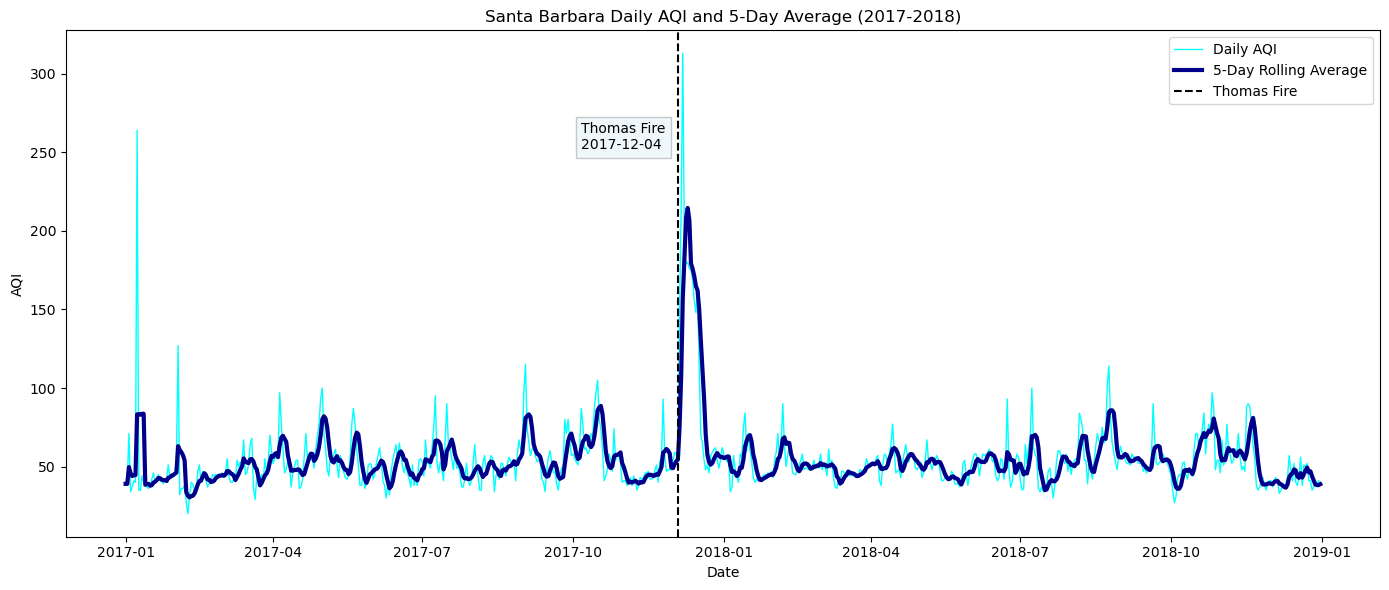

In [19]:
# Import plotting library
import matplotlib.pyplot as plt

# Create an empty figure
plt.figure(figsize = (14, 6))

# Plot the daily AQI values
plt.plot(aqi_sb.index, 
         aqi_sb['aqi'], 
         label = 'Daily AQI', 
         linewidth = 1,
         color = 'cyan'
        )

# Plot the five-day rolling average of AQI
plt.plot(aqi_sb.index, 
         aqi_sb['five_day_average'],
         label  = '5-Day Rolling Average',
         linewidth = 3,
         color = 'darkblue'
        )

# Mark the start date of the Thomas Fire with a vertical dashed line
plt.axvline(pd.to_datetime('2017-12-04'), 
            color = 'k', 
            linestyle = '--', 
            label = "Thomas Fire"
           )

# Annotate the Thomas Fire event on the graph
plt.text(pd.to_datetime('2017-10-06'), 250, 'Thomas Fire\n2017-12-04', 
         rotation = 360, 
         verticalalignment = 'bottom', 
         fontsize = 10, 
         bbox = dict(facecolor = 'lightblue', alpha = 0.2)
        )

# Add title and axis labels
plt.title('Santa Barbara Daily AQI and 5-Day Average (2017-2018)')
plt.xlabel('Date')
plt.ylabel('AQI')

# Display the legend and adjust the layout
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation
_The plot clearly shows a noticeable spike in AQI levels around early December 2017. This spike coincides with the start of the Thomas Fire. The sharp rise in both the daily AQI and the 5-day rolling average indicates a significant deterioration in air quality during that period. This visual correlation strongly suggests that the fire had a direct impact on air pollution levels in Santa Barbara._

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [20]:
grader.check_all()

q3_a results: All test cases passed!

q4 results: All test cases passed!

q6a results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).